In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt

1. Start by using either the inspector or by viewing the page source. Can you identify a tag that might be helpful for finding the names of all inductees? Make use of this to create a list containing just the names of each inductee.

https://countrymusichalloffame.org/hall-of-fame/members/
bring stuff in from site and use find

In [43]:
web_url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
name_list = []

#iterate across all 16 pages to get needed data
for page in range(1,17):
    response = requests.get(web_url + str(page))
    soup = BeautifulSoup(response.content)

    for tag in soup.find_all('h3'):
        name_list.append(tag.get_text())
    
name_list 

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond',
 'Bobby Braddock',
 'Harold Bradley',
 'Jerry Bradley',
 'Owen Bradley',
 'Rod Brasfield',
 'Garth Brooks',
 'Brooks & Dunn',
 'Jim Ed Brown',
 'Jim Ed Brown and the Browns',
 'Boudleaux and Felice Bryant',
 'Glen Campbell',
 'Bill Carlisle',
 'Carter Family',
 'Johnny Cash',
 'Roy Clark',
 'Cowboy Jack Clement',
 'Patsy Cline',
 'Hank Cochran',
 'Paul Cohen',
 'Floyd Cramer',
 'Vernon Dalhart',
 'Charlie Daniels',
 'Jimmie Davis',
 'Jimmy Dean',
 'Delmore Brothers',
 'Jim Denny',
 'Little Jimmy Dickens',
 'Ralph Emery',
 'The Everly Brothers',
 'Flatt And Scruggs',
 'Jim Foglesong',
 'Red Foley',
 'Tennessee Ernie Ford',
 'Fred Foster',
 'Joseph Frank',
 'Lefty Frizzell',
 'Connie B. Gay',
 'Don Gibson',
 'Vince Gill',
 'Johnny Gimble',
 'Merle Haggard',
 'Tom T. Hall',
 'Emmylou Harris',
 'George D. Hay',
 'Homer and Jethro',
 'Roy Horton',
 'Har

In [3]:
web_url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
ind_year = []

#iterate across all 16 pages to get needed data
for page in range(1,17):
    response = requests.get(web_url + str(page))
    soup = BeautifulSoup(response.content)
    
    for tag in soup.find_all(text = re.compile('Inducted \d{4}')):
        ind_year.append(tag)
        
        
ind_year

['\n                    Inducted 1962                  ',
 '\n                    Inducted 2005                  ',
 '\n                    Inducted 2001                  ',
 '\n                    Inducted 1966                  ',
 '\n                    Inducted 1973                  ',
 '\n                    Inducted 1969                  ',
 '\n                    Inducted 2005                  ',
 '\n                    Inducted 2013                  ',
 '\n                    Inducted 1999                  ',
 '\n                    Inducted 2011                  ',
 '\n                    Inducted 2006                  ',
 '\n                    Inducted 2019                  ',
 '\n                    Inducted 1974                  ',
 '\n                    Inducted 1987                  ',
 '\n                    Inducted 2012                  ',
 '\n                    Inducted 2019                  ',
 '\n                    Inducted 2015                  ',
 '\n          

In [4]:
clean_year = []

for year in ind_year:
    just_year = re.findall('\d{4}', year)
    clean_year.extend(just_year)
    
    
clean_year

['1962',
 '2005',
 '2001',
 '1966',
 '1973',
 '1969',
 '2005',
 '2013',
 '1999',
 '2011',
 '2006',
 '2019',
 '1974',
 '1987',
 '2012',
 '2019',
 '2015',
 '2015',
 '1991',
 '2005',
 '2002',
 '1970',
 '1980',
 '2009',
 '2013',
 '1973',
 '2014',
 '1976',
 '2003',
 '1981',
 '2016',
 '1972',
 '2010',
 '2001',
 '1966',
 '1983',
 '2007',
 '2001',
 '1985',
 '2004',
 '1967',
 '1990',
 '2016',
 '1967',
 '1982',
 '1980',
 '2001',
 '2007',
 '2018',
 '1994',
 '2008',
 '2008',
 '1966',
 '2001',
 '1982',
 '1997',
 '2010',
 '2017',
 '2006',
 '2001',
 '1992',
 '1978',
 '2001',
 '1974',
 '2004',
 '2001',
 '1997',
 '1979',
 '2001',
 '1988',
 '1966',
 '2009',
 '2015',
 '2009',
 '2011',
 '1995',
 '2014',
 '1970',
 '1996',
 '1998',
 '2001',
 '1993',
 '2015',
 '1996',
 '1999',
 '1975',
 '1984',
 '2001',
 '2001',
 '1998',
 '1992',
 '1996',
 '2000',
 '2017',
 '1967',
 '1964',
 '2012',
 '1982',
 '1961',
 '2013',
 '1988',
 '1961',
 '1986',
 '1971',
 '2017',
 '2011',
 '2010',
 '1967',
 '2018',
 '2003',
 '2012',
 

In [5]:
cm_hof = pd.DataFrame(list(zip(name_list, clean_year)), columns = ['artist', 'ind_yr'])
cm_hof.head(15)

,artist,ind_yr
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999
9,Bobby Braddock,2011


In [6]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' />\n<link rel="profile" href="https://gmpg.org/xfn/11" />\n<link rel="pingback" href="https://countrymusichalloffame.org/wp/xmlrpc.php" />\n<!--[if lt IE 9]>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-them

In [7]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [8]:
print(soup)

<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://countrymusichalloffame.org/wp/xmlrpc.php" rel="pingback"/>
<!--[if lt IE 9]>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/respond.min.js"></script>
<![endif]-->
<title>Hall of Fam

In [9]:
artists = soup.find_all('h3')
artists

[<h3>Hank Williams</h3>,
 <h3>Bob Wills</h3>,
 <h3>Mac Wiseman</h3>,
 <h3>Tammy Wynette</h3>,
 <h3>Faron Young</h3>]

regex to remove or string manip

In [10]:
artist = soup.find('h3')
artist

<h3>Hank Williams</h3>

In [11]:
artist.text
#will give error if going for full list. use in loop to find full list.

'Hank Williams'

In [12]:
name_list = []

for tag in soup.find_all('h3'):
    name_list.append(tag.get_text())
    
name_list

['Hank Williams', 'Bob Wills', 'Mac Wiseman', 'Tammy Wynette', 'Faron Young']

2. Next, try and find a tag that could be used to find the year that each member was inducted. Extract these into a list. When you do this, be sure to only include the year and not the full text. For example, for Roy Acuff, the list entry should be "1962" and not "Inducted 1962". Double-check that the resulting list has the correct number of elements and is in the same order as your inductees list.

In [13]:
yr_ind = soup.find_all('p')
yr_ind

[<p>Masks are required for educational programs in the Museum’s theaters and classrooms, as well as for tours to Historic RCA Studio B and Hatch Show Print.</p>,
 <p style="text-align: center;">Open Daily</p>,
 <p></p>,
 <p>Election to the Country Music Hall of Fame is country music's highest honor. The Country Music Association (CMA), the country music industry's trade organization, created the accolade to recognize significant contributions to the advancement of country music by individuals in both the creative and business communities. The first members—Jimmie Rodgers, Fred Rose, and Hank Williams—were inducted in 1961.</p>,
 <p>
                     Inducted 1961                  </p>,
 <p>
                     Inducted 1968                  </p>,
 <p>
                     Inducted 2014                  </p>,
 <p>
                     Inducted 1998                  </p>,
 <p>
                     Inducted 2000                  </p>,
 <p>STAY UP TO DATE</p>,
 <p>FOLLOW US</p>,
 <p s

In [14]:
year_results = soup.find_all(text = re.compile('Inducted \d{4}'))
year_results

#create list and then strip to remove whitespace

['\n                    Inducted 1961                  ',
 '\n                    Inducted 1968                  ',
 '\n                    Inducted 2014                  ',
 '\n                    Inducted 1998                  ',
 '\n                    Inducted 2000                  ']

In [15]:
year_list = []

for year in year_results:
    year_list.append(year)
    
year_list

clean_year = []

for c_year in year_list:
    just_year = re.findall('\d{4}', c_year)
    clean_year.extend(just_year)
    
    
clean_year

['1961', '1968', '2014', '1998', '2000']

3. Take the two lists you created on parts 1 and 2 and convert it into a pandas DataFrame.

In [16]:
CM_HOF = pd.DataFrame(list(zip(name_list, clean_year)), columns = ['artist', 'ind_yr'])

CM_HOF.head()

,artist,ind_yr
0,Hank Williams,1961
1,Bob Wills,1968
2,Mac Wiseman,2014
3,Tammy Wynette,1998
4,Faron Young,2000


4. Now, you need to take what you created for the first page and apply it across the rest of the pages so that you can scrape all inductees. Notice that when you click the next page button at the bottom of the page that the url changes to "https://countrymusichalloffame.org/hall-of-fame/members/page/2". Check that the code that you wrote for the first page still works for page 2. Once you have verified that your code will still work, write a for loop that will cycle through all 16 pages and build a DataFrame containing all inductees and the year of their induction.

web_url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
name_list = []

#iterate across all 16 pages to get needed data
for page in range(1,17):
    response = requests.get(web_url + str(page))
    soup = BeautifulSoup(response.content)

    for tag in soup.find_all('h3'):
        name_list.append(tag.get_text())
    
name_list 

# Added in cell 2

5. Create a visual using the data that you scraped. Prepare a short (<5 minute) presentation.

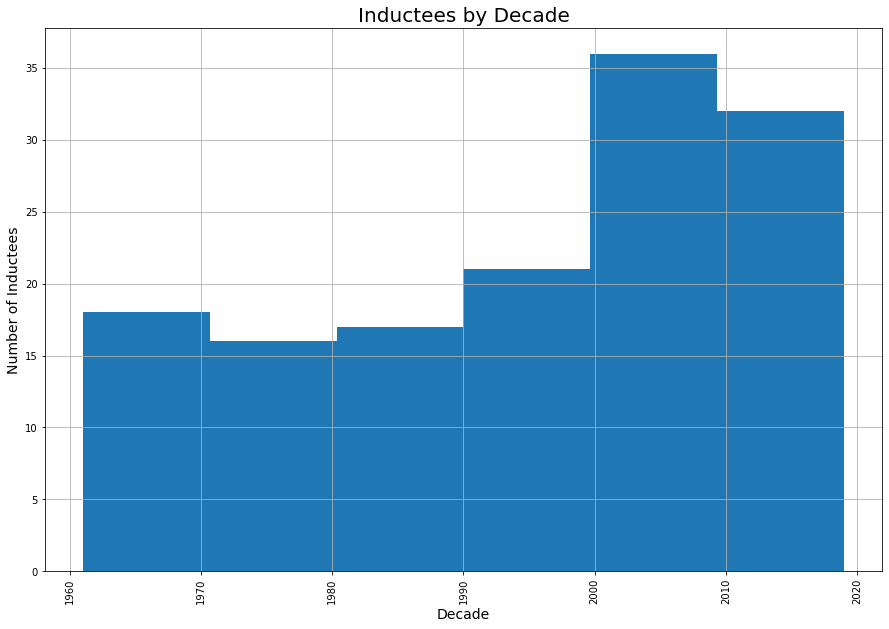

In [38]:
cm_hof['ind_yr'] = cm_hof['ind_yr'].astype(int)
years = cm_hof['ind_yr']

years.hist(bins = 6, figsize = (15,10))
plt.xticks(rotation='vertical')
plt.title('Inductees by Decade', fontsize = 20)
plt.xlabel('Decade', fontsize = 14)
plt.ylabel('Number of Inductees', fontsize = 14)

#rotate date ticks
plt.show()

#font size changes, change years to integer to get in correct order, group by 10 year increments


6. **Bonus Question:** If you navigate to [Roy Acuff's page](https://countrymusichalloffame.org/artist/roy-acuff/), you will see that his date of birth and date of death are listed towards the top of the page, along with his birthplace. Write some code that will extract these three values. Once you get it working for Roy Acuff, figure out how you can automatically extract these values across the whole dataset of artists. In doing this, you'll need to figure out a way to automatically determine the correct urls for each artist. Note also that not every artist will have these three values, so write your code in a way that it can handle cases where these values are missing. [Alabama](https://countrymusichalloffame.org/artist/alabama/) is one such example. 

In [44]:
name_list

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond',
 'Bobby Braddock',
 'Harold Bradley',
 'Jerry Bradley',
 'Owen Bradley',
 'Rod Brasfield',
 'Garth Brooks',
 'Brooks & Dunn',
 'Jim Ed Brown',
 'Jim Ed Brown and the Browns',
 'Boudleaux and Felice Bryant',
 'Glen Campbell',
 'Bill Carlisle',
 'Carter Family',
 'Johnny Cash',
 'Roy Clark',
 'Cowboy Jack Clement',
 'Patsy Cline',
 'Hank Cochran',
 'Paul Cohen',
 'Floyd Cramer',
 'Vernon Dalhart',
 'Charlie Daniels',
 'Jimmie Davis',
 'Jimmy Dean',
 'Delmore Brothers',
 'Jim Denny',
 'Little Jimmy Dickens',
 'Ralph Emery',
 'The Everly Brothers',
 'Flatt And Scruggs',
 'Jim Foglesong',
 'Red Foley',
 'Tennessee Ernie Ford',
 'Fred Foster',
 'Joseph Frank',
 'Lefty Frizzell',
 'Connie B. Gay',
 'Don Gibson',
 'Vince Gill',
 'Johnny Gimble',
 'Merle Haggard',
 'Tom T. Hall',
 'Emmylou Harris',
 'George D. Hay',
 'Homer and Jethro',
 'Roy Horton',
 'Har

In [ ]:
web_url = 'https://countrymusichalloffame.org/artist/roy-acuff/'
blender = []